# 0.0 IMPORTS

In [1]:
import math
import datetime
import numpy as np
import pandas as pd
import inflection
import seaborn as sns
import  matplotlib 
import  matplotlib.pyplot as plt
import sqlite3
import sqlalchemy

from scipy                          import stats as ss
from tabulate                       import tabulate
from IPython.display                import Image
from IPython.core.display           import HTML
from  matplotlib.gridspec           import GridSpec
from sqlalchemy                     import create_engine

## 0.1 Helper Functions

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [ ]:
jupyter_settings()

In [ ]:
# Notação Científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

## LOADING DATA

In [2]:
pwd

'C:\\Users\\Utilizador\\repos\\Python_ds_ao_dev\\Projeto_Star_Jeans'

In [3]:
path = 'C:\\Users\\Utilizador\\repos\\Python_ds_ao_dev\\Projeto_Star_Jeans\\'
database_name= 'data_base_hm.sqlite'
conn = create_engine('sqlite:///' + path + database_name, echo=False)

In [4]:
query = """
    SELECT * FROM vitrine_two
"""

In [6]:
data = pd.read_sql(query, con=conn)
data

,product_id,style_id,color_id,product_name,color_name,product_type,Fit,product_price,messages.waistRise,shell_cotton,shell_polyester,shell_spandex,scrapy_datetime
0,0875105024,0875105,024,men_jeans_relaxed,denim_blue,relaxed_jeans,relaxed_fit,29.99,regular_waist,1.00,NaN,NaN,2022-06-17 10:35:02.000000
1,0875105024,0875105,024,men_jeans_relaxed,dark_denim_blue,relaxed_jeans,relaxed_fit,29.99,regular_waist,1.00,NaN,NaN,2022-06-17 10:35:02.000000
2,0875105024,0875105,024,men_jeans_relaxed,pale_denim_blue,relaxed_jeans,relaxed_fit,29.99,regular_waist,1.00,NaN,NaN,2022-06-17 10:35:02.000000
3,0875105024,0875105,024,men_jeans_relaxed,black,relaxed_jeans,relaxed_fit,29.99,regular_waist,1.00,NaN,NaN,2022-06-17 10:35:02.000000
4,0875105024,0875105,024,men_jeans_relaxed,light_denim_blue,relaxed_jeans,relaxed_fit,29.99,regular_waist,1.00,NaN,NaN,2022-06-17 10:35:02.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0427159006,0427159,006,men_jeans_ripped,super_light_denim_blue,trashed_skinny_jeans,skinny_fit,39.99,regular_waist,0.93,0.06,0.01,2022-06-17 10:35:02.000000
108,0427159006,0427159,006,men_jeans_ripped,black_trashed,trashed_skinny_jeans,skinny_fit,39.99,regular_waist,0.93,0.06,0.01,2022-06-17 10:35:02.000000
109,0427159006,0427159,006,men_jeans_ripped,light_denim_blue,trashed_skinny_jeans,skinny_fit,39.99,regular_waist,0.93,0.06,0.01,2022-06-17 10:35:02.000000
110,0427159006,0427159,006,men_jeans_ripped,denim_blue_bleached,trashed_skinny_jeans,skinny_fit,39.99,regular_waist,0.93,0.06,0.01,2022-06-17 10:35:02.000000


# 1.0 DATA CLEANING

## Data Description

In [7]:
df1 = data.copy()

In [8]:
df1.columns

Index(['product_id', 'style_id', 'color_id', 'product_name', 'color_name',
       'product_type', 'Fit', 'product_price', 'messages.waistRise',
       'shell_cotton', 'shell_polyester', 'shell_spandex', 'scrapy_datetime'],
      dtype='object')

## 1.1 Rename Columns

In [9]:
cols_old = ['product_id', 
            'syle_id', 
            'color_id', 
            'product_name', 
            'color_name', 
            'product_type', 
            'Fit',
            'product_price', 
            'messages.waistRise', 
            'shell_cotton',
            'shell_polyester',
            'shell_spandex',
            'scrapy_datetime']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

# Rename
df1.columns = cols_new
df1.columns

Index(['product_id', 'syle_id', 'color_id', 'product_name', 'color_name',
       'product_type', 'fit', 'product_price', 'messages.waist_rise',
       'shell_cotton', 'shell_polyester', 'shell_spandex', 'scrapy_datetime'],
      dtype='object')

## 1.2 Data Dimensions

In [10]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 112
Number of Cols: 13


## 1.3 Data Types

In [11]:
df1.dtypes

product_id              object
syle_id                 object
color_id                object
product_name            object
color_name              object
product_type            object
fit                     object
product_price          float64
messages.waist_rise     object
shell_cotton           float64
shell_polyester        float64
shell_spandex          float64
scrapy_datetime         object
dtype: object

In [12]:
df1['scrapy_datetime'] = pd.to_datetime(df1['scrapy_datetime'])

## 1.4 Check NA

In [13]:
df1.isna().sum()

product_id              0
syle_id                 0
color_id                0
product_name            0
color_name              0
product_type            0
fit                     0
product_price           0
messages.waist_rise     0
shell_cotton            0
shell_polyester        12
shell_spandex          95
scrapy_datetime         0
dtype: int64

## 1.5 Fillout NA

In [14]:
df1['shell_spandex'] = df1['shell_spandex'].apply(lambda x: 0.0 if math.isnan(x) else x)
df1['shell_polyester'] = df1['shell_polyester'].apply(lambda x: 0.0 if math.isnan(x) else x)

In [15]:
# Checando se eliminamos os NA
df1.isna().sum() / df1.shape[0]

product_id             0.0
syle_id                0.0
color_id               0.0
product_name           0.0
color_name             0.0
product_type           0.0
fit                    0.0
product_price          0.0
messages.waist_rise    0.0
shell_cotton           0.0
shell_polyester        0.0
shell_spandex          0.0
scrapy_datetime        0.0
dtype: float64

## 1.6 Change Types 

In [16]:
# Após tranformações devemos checar novamente os tipos das colunas
df1.dtypes

product_id                     object
syle_id                        object
color_id                       object
product_name                   object
color_name                     object
product_type                   object
fit                            object
product_price                 float64
messages.waist_rise            object
shell_cotton                  float64
shell_polyester               float64
shell_spandex                 float64
scrapy_datetime        datetime64[ns]
dtype: object

## 1.7 Descriptive Statistical

In [17]:
num_attributes = df1.select_dtypes(include=['int64','float64' ])
num_attributes

,product_price,shell_cotton,shell_polyester,shell_spandex
0,29.99,1.00,0.00,0.00
1,29.99,1.00,0.00,0.00
2,29.99,1.00,0.00,0.00
3,29.99,1.00,0.00,0.00
4,29.99,1.00,0.00,0.00
...,...,...,...,...
107,39.99,0.93,0.06,0.01
108,39.99,0.93,0.06,0.01
109,39.99,0.93,0.06,0.01
110,39.99,0.93,0.06,0.01


In [18]:
num_attributes.sample(2)

,product_price,shell_cotton,shell_polyester,shell_spandex
69,39.99,0.98,0.02,0.0
1,29.99,1.00,0.00,0.0


In [19]:
cat_attributes = df1.select_dtypes(exclude=['int64','float64', 'datetime64[ns]'])
cat_attributes

,product_id,syle_id,color_id,product_name,color_name,product_type,fit,messages.waist_rise
0,0875105024,0875105,024,men_jeans_relaxed,denim_blue,relaxed_jeans,relaxed_fit,regular_waist
1,0875105024,0875105,024,men_jeans_relaxed,dark_denim_blue,relaxed_jeans,relaxed_fit,regular_waist
2,0875105024,0875105,024,men_jeans_relaxed,pale_denim_blue,relaxed_jeans,relaxed_fit,regular_waist
3,0875105024,0875105,024,men_jeans_relaxed,black,relaxed_jeans,relaxed_fit,regular_waist
4,0875105024,0875105,024,men_jeans_relaxed,light_denim_blue,relaxed_jeans,relaxed_fit,regular_waist
...,...,...,...,...,...,...,...,...
107,0427159006,0427159,006,men_jeans_ripped,super_light_denim_blue,trashed_skinny_jeans,skinny_fit,regular_waist
108,0427159006,0427159,006,men_jeans_ripped,black_trashed,trashed_skinny_jeans,skinny_fit,regular_waist
109,0427159006,0427159,006,men_jeans_ripped,light_denim_blue,trashed_skinny_jeans,skinny_fit,regular_waist
110,0427159006,0427159,006,men_jeans_ripped,denim_blue_bleached,trashed_skinny_jeans,skinny_fit,regular_waist


In [20]:
cat_attributes.sample(2)

,product_id,syle_id,color_id,product_name,color_name,product_type,fit,messages.waist_rise
21,0971061005,0971061,005,men_jeans_slim,pale_denim_blue,slim_tapered_cropped_jeans,slim_fit,regular_waist
17,0690449022,0690449,022,men_jeans_ripped,light_denim_blue_trashed,skinny_jeans,skinny_fit,regular_waist


## 1.7.1 Numerical Attributes

In [21]:
# Tendência centra: como os dados estão :

# Média
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T

# Mediana
ct2= pd.DataFrame(num_attributes.apply(np.median)).T

In [22]:
# Dispersão: std, min, max, range, skew(assimetria), kurtosis(calda longa)

d1 = pd.DataFrame(num_attributes.apply(np.std)).T

d2 = pd.DataFrame(num_attributes.apply(np.min)).T

d3 = pd.DataFrame(num_attributes.apply(np.max)).T

d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T

d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

In [23]:
# concat

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,product_price,29.99,44.99,15.00,38.427500,39.99,4.065933,-1.382575,0.716084
1,shell_cotton,0.78,1.00,0.22,0.968571,0.98,0.044418,-3.475377,12.186685
2,shell_polyester,0.00,0.21,0.21,0.029911,0.02,0.041651,3.641423,13.305920
3,shell_spandex,0.00,0.01,0.01,0.001518,0.00,0.003588,1.967370,1.904235


C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


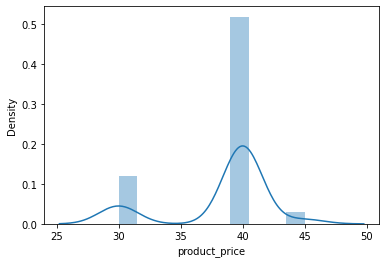

In [24]:
sns.distplot(df1['product_price']);

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


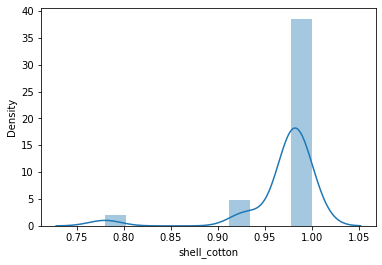

In [25]:
sns.distplot(df1['shell_cotton']);

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


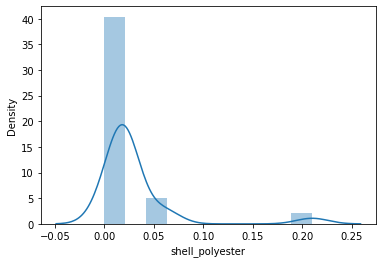

In [26]:
sns.distplot(df1['shell_polyester']);

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


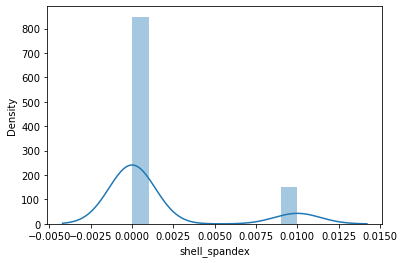

In [27]:
sns.distplot(df1['shell_spandex']);

## 1.7.2 Categorical Attributes

In [28]:
# Tipo unicos das variaveis categoricas por coluna
cat_attributes.apply(lambda x: x.unique().shape[0])

product_id             11
syle_id                 5
color_id               11
product_name            4
color_name             28
product_type            5
fit                     4
messages.waist_rise     1
dtype: int64

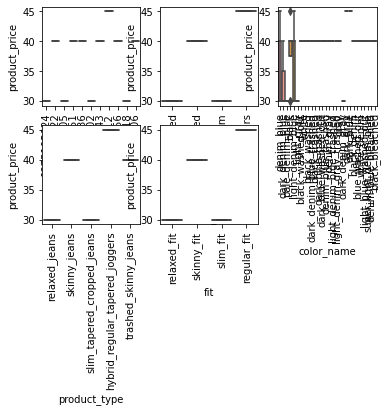

In [29]:
plt.subplot(2,3,1)
sns.boxplot(x='product_id', y='product_price', data=df1)
plt.xticks(rotation=90);

plt.subplot(2,3,2)
sns.boxplot(x='product_name', y='product_price', data=df1)
plt.xticks(rotation=90);


plt.subplot(2,3,3)
sns.boxplot(x='color_name', y='product_price', data=df1)
plt.xticks(rotation=90);


plt.subplot(2,3,4)
sns.boxplot(x='product_type', y='product_price', data=df1);
plt.xticks(rotation=90);

plt.subplot(2,3,5)
sns.boxplot(x='fit', y='product_price', data=df1);
plt.xticks(rotation=90);

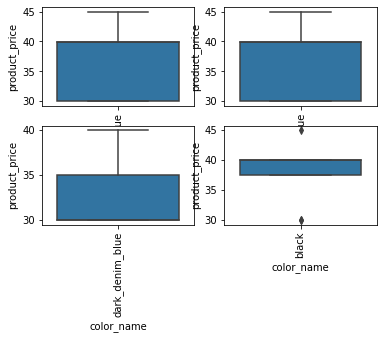

In [30]:
plt.subplot(2,2,1)
aux1 = df1[(df1['color_name'] == 'denim_blue')]
sns.boxplot(x='color_name', y='product_price', data=aux1)
plt.xticks(rotation=90);

plt.subplot(2,2,2)
aux2 = df1[(df1['color_name'] == 'light_denim_blue')]
sns.boxplot(x='color_name', y='product_price', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2,2,3)
aux3 = df1[(df1['color_name'] == 'dark_denim_blue')]
sns.boxplot(x='color_name', y='product_price', data=aux3)
plt.xticks(rotation=90);

plt.subplot(2,2,4)
aux4 = df1[(df1['color_name'] == 'black')]
sns.boxplot(x='color_name', y='product_price', data=aux4)
plt.xticks(rotation=90);

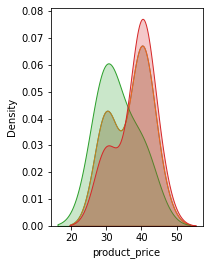

In [31]:
plt.subplot(1,2,2)
sns.kdeplot(df1[df1['color_name'] == 'denim_blue']       ['product_price'], label='denim_blue' ,shade=True)
sns.kdeplot(df1[df1['color_name'] == 'light_denim_blue'] ['product_price'], label='light_denim_blue' ,shade=True)
sns.kdeplot(df1[df1['color_name'] == 'dark_denim_blue']  ['product_price'], label='dark_denim_blue' ,shade=True)
sns.kdeplot(df1[df1['color_name'] == 'black']            ['product_price'], label='black' ,shade=True);

# 2.0 FEATURE ENGINEERING

In [32]:
df2 = df1.copy()

## <s>2.1 Hypoteses Mind<s>

## <s>2.2 Criação de Hipoteses<s>

## <s>Lista Final de Hipóteses<s>

## 2.3 Feature Engineering:

    Derivação das foi realizada no webscreping
    
            - Composition: shell_cotton, shell_polyester, shell_spandex
            - product_id: style_id, color_id

In [33]:
df2.head().T

,0,1,2,3,4
product_id,0875105024,0875105024,0875105024,0875105024,0875105024
syle_id,0875105,0875105,0875105,0875105,0875105
color_id,024,024,024,024,024
product_name,men_jeans_relaxed,men_jeans_relaxed,men_jeans_relaxed,men_jeans_relaxed,men_jeans_relaxed
color_name,denim_blue,dark_denim_blue,pale_denim_blue,black,light_denim_blue
product_type,relaxed_jeans,relaxed_jeans,relaxed_jeans,relaxed_jeans,relaxed_jeans
fit,relaxed_fit,relaxed_fit,relaxed_fit,relaxed_fit,relaxed_fit
product_price,29.99,29.99,29.99,29.99,29.99
messages.waist_rise,regular_waist,regular_waist,regular_waist,regular_waist,regular_waist
shell_cotton,1.0,1.0,1.0,1.0,1.0


# 3.0 VARIABLE FILTERING

In [34]:
df3 = df2.copy()

In [35]:
df3.head()

,product_id,syle_id,color_id,product_name,color_name,product_type,fit,product_price,messages.waist_rise,shell_cotton,shell_polyester,shell_spandex,scrapy_datetime
0,0875105024,0875105,024,men_jeans_relaxed,denim_blue,relaxed_jeans,relaxed_fit,29.99,regular_waist,1.0,0.0,0.0,2022-06-17 10:35:02
1,0875105024,0875105,024,men_jeans_relaxed,dark_denim_blue,relaxed_jeans,relaxed_fit,29.99,regular_waist,1.0,0.0,0.0,2022-06-17 10:35:02
2,0875105024,0875105,024,men_jeans_relaxed,pale_denim_blue,relaxed_jeans,relaxed_fit,29.99,regular_waist,1.0,0.0,0.0,2022-06-17 10:35:02
3,0875105024,0875105,024,men_jeans_relaxed,black,relaxed_jeans,relaxed_fit,29.99,regular_waist,1.0,0.0,0.0,2022-06-17 10:35:02
4,0875105024,0875105,024,men_jeans_relaxed,light_denim_blue,relaxed_jeans,relaxed_fit,29.99,regular_waist,1.0,0.0,0.0,2022-06-17 10:35:02


## 3.1 Line filtering

In [36]:
df3 = df3[(df3['product_price'] != 0)]

## 3.2 Selection of columns

In [37]:
cols_drop= ['messages.waist_rise']
df3 = df3.drop(cols_drop, axis=1)

In [38]:
df3.columns

Index(['product_id', 'syle_id', 'color_id', 'product_name', 'color_name',
       'product_type', 'fit', 'product_price', 'shell_cotton',
       'shell_polyester', 'shell_spandex', 'scrapy_datetime'],
      dtype='object')

# 4.0 EXPLORATORY DATA ANALYSISIS

In [39]:
df4 = df3.copy()

## 4.1 Análise Univariada

### 4.1.1 Análise Variavél Resposta

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


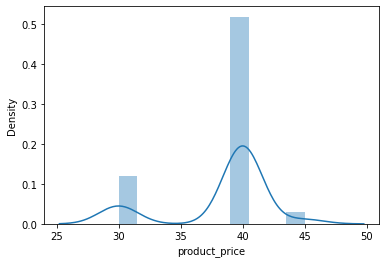

In [40]:
sns.distplot(df4['product_price']);

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


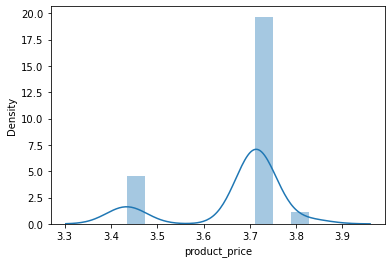

In [41]:
# Uma das formas de realizar o ajuste (modificação), para chegar mais proximo da curva normal é multiplicar pelo log
sns.distplot(np.log1p(df4['product_price']));

### 4.1.2 Análise Variavél Numérica

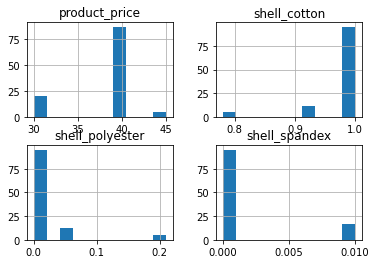

In [42]:
num_attributes.hist();

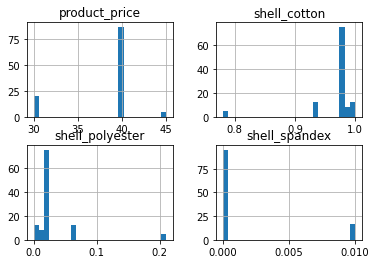

In [43]:
num_attributes.hist(bins=25);

### 4.1.3 Análise Variavél Categórica

In [44]:
cat_attributes.head()

,product_id,syle_id,color_id,product_name,color_name,product_type,fit,messages.waist_rise
0,0875105024,0875105,024,men_jeans_relaxed,denim_blue,relaxed_jeans,relaxed_fit,regular_waist
1,0875105024,0875105,024,men_jeans_relaxed,dark_denim_blue,relaxed_jeans,relaxed_fit,regular_waist
2,0875105024,0875105,024,men_jeans_relaxed,pale_denim_blue,relaxed_jeans,relaxed_fit,regular_waist
3,0875105024,0875105,024,men_jeans_relaxed,black,relaxed_jeans,relaxed_fit,regular_waist
4,0875105024,0875105,024,men_jeans_relaxed,light_denim_blue,relaxed_jeans,relaxed_fit,regular_waist


## product_id

In [50]:
df4['product_id'].drop_duplicates()

0      0875105024
6      0690449022
21     0971061005
25     0690449051
40     0690449036
55     0971061002
59     0690449043
74     1013317012
79     0690449056
94     0875105018
100    0427159006
Name: product_id, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


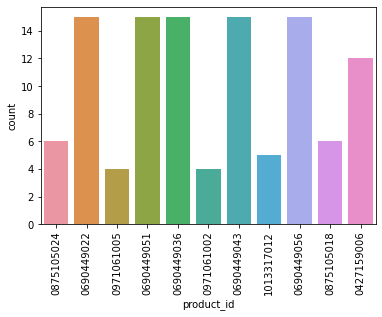

In [51]:
sns.countplot(df4['product_id'])
plt.xticks(rotation=90);

## style_id

In [56]:
df4['syle_id'].drop_duplicates()

0      0875105
6      0690449
21     0971061
74     1013317
100    0427159
Name: syle_id, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


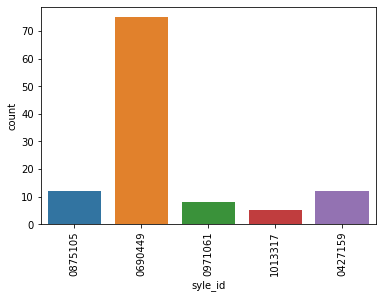

In [57]:
sns.countplot(df4['syle_id'])
plt.xticks(rotation=90);

## color_id

In [58]:
df4['color_id'].drop_duplicates()

0      024
6      022
21     005
25     051
40     036
55     002
59     043
74     012
79     056
94     018
100    006
Name: color_id, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


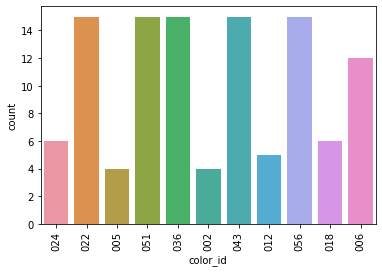

In [59]:
sns.countplot(df4['color_id'])
plt.xticks(rotation=90);

## product_name

In [69]:
df4['product_name'].drop_duplicates()

0     men_jeans_relaxed
6      men_jeans_ripped
21       men_jeans_slim
74    men_jeans_joggers
Name: product_name, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


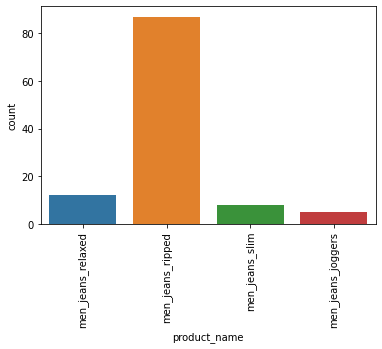

In [70]:
sns.countplot(df4['product_name'])
plt.xticks(rotation=90);

## color_name

In [71]:
df4['color_name'].drop_duplicates()

0                    denim_blue
1               dark_denim_blue
2               pale_denim_blue
3                         black
4              light_denim_blue
5                    light_gray
7              black_washed_out
8                         white
9                  black_washed
10      dark_denim_blue_trashed
11                black_trashed
12            dark_blue_trashed
13         dark_blue_washed_out
14           denim_blue_trashed
16                   denim_gray
17     light_denim_blue_trashed
18     light_denim_gray_trashed
19                         gray
23              dark_denim_gray
75                    dark_gray
76                    dark_blue
100                 black_denim
101             blue_washed_out
105                 white_denim
106       light_blue_washed_out
107      super_light_denim_blue
110         denim_blue_bleached
111              black_bleached
Name: color_name, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


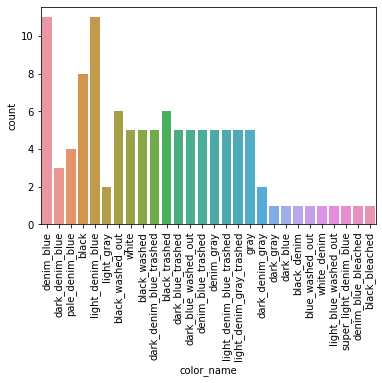

In [72]:
sns.countplot(df4['color_name'])
plt.xticks(rotation=90);

## product_type

In [73]:
df4['product_type'].drop_duplicates()

0                       relaxed_jeans
6                        skinny_jeans
21         slim_tapered_cropped_jeans
74     hybrid_regular_tapered_joggers
100              trashed_skinny_jeans
Name: product_type, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


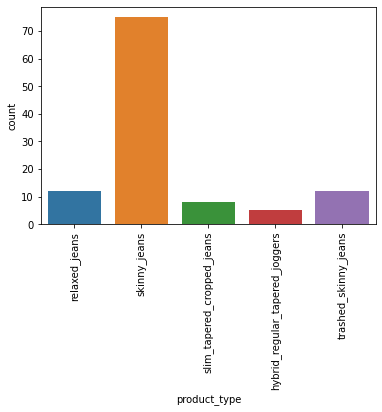

In [75]:
sns.countplot(df4['product_type'])
plt.xticks(rotation=90);

## fit

In [76]:
df4['fit'].drop_duplicates()

0     relaxed_fit
6      skinny_fit
21       slim_fit
74    regular_fit
Name: fit, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


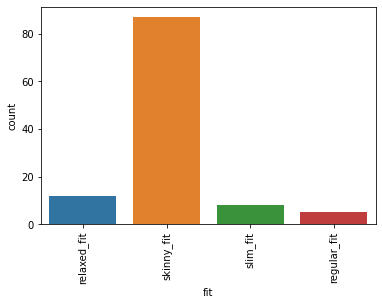

In [79]:
sns.countplot(df4['fit'])
plt.xticks(rotation=90);

## 4.2 Análise Bivariada